<a href="https://colab.research.google.com/github/iamsaugatbista/Professional_class/blob/main/ARIMA_SARIMAX_Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saugatbista","key":"d9da6968d4b48a027e25d47a75f35079"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json



In [ ]:
!pip install kaggle



In [ ]:
!kaggle competitions download -c store-sales-time-series-forecasting


  0% 0.00/21.4M [00:00<?, ?B/s]
100% 21.4M/21.4M [00:00<00:00, 602MB/s]


In [ ]:
!unzip store-sales-time-series-forecasting.zip



Archive:  store-sales-time-series-forecasting.zip
  inflating: holidays_events.csv     
  inflating: oil.csv                 
  inflating: sample_submission.csv   
  inflating: stores.csv              
  inflating: test.csv                
  inflating: train.csv               
  inflating: transactions.csv        


In [ ]:
import pandas as pd

df = pd.read_csv("train.csv")
df.head()


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [ ]:
df1 = df[
    (df['store_nbr'] == 1) &
    (df['family'] == "GROCERY I")
].copy()

print("Filtered rows:", len(df1))
df1.head()


Filtered rows: 1684


,id,date,store_nbr,family,sales,onpromotion
12,12,2013-01-01,1,GROCERY I,0.0,0
1794,1794,2013-01-02,1,GROCERY I,2652.0,0
3576,3576,2013-01-03,1,GROCERY I,2121.0,0
5358,5358,2013-01-04,1,GROCERY I,2056.0,0
7140,7140,2013-01-05,1,GROCERY I,2216.0,0


In [ ]:
df1['date'] = pd.to_datetime(df1['date'])
df1 = df1.sort_values('date')
df1 = df1.set_index('date')

print(df1.head())
print(df1.tail())


              id  store_nbr     family   sales  onpromotion
date                                                       
2013-01-01    12          1  GROCERY I     0.0            0
2013-01-02  1794          1  GROCERY I  2652.0            0
2013-01-03  3576          1  GROCERY I  2121.0            0
2013-01-04  5358          1  GROCERY I  2056.0            0
2013-01-05  7140          1  GROCERY I  2216.0            0
                 id  store_nbr     family   sales  onpromotion
date                                                          
2017-08-11  2991990          1  GROCERY I  1270.0           24
2017-08-12  2993772          1  GROCERY I  1630.0           28
2017-08-13  2995554          1  GROCERY I   952.0           19
2017-08-14  2997336          1  GROCERY I  2407.0           30
2017-08-15  2999118          1  GROCERY I  2508.0           29


In [ ]:
sales = df1['sales'].asfreq('D')

print("Missing days:", sales.isna().sum())

sales = sales.ffill()

print("Final length:", len(sales))


Missing days: 4
Final length: 1688


In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(sales)

print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: -4.139220298948379
p-value: 0.0008336304142674237


In [ ]:
!pip install pmdarima statsmodels


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 11.2 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima

auto_model = auto_arima(
    sales,
    seasonal=True,
    m=7,
    trace=True,
    stepwise=True,
    suppress_warnings=True
)

auto_model.summary()



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=12.11 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=27814.776, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=26641.721, Time=2.39 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=inf, Time=2.22 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=27812.780, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=27481.261, Time=0.12 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=26355.836, Time=2.85 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=inf, Time=11.85 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=inf, Time=5.01 sec
 ARIMA(0,1,0)(2,0,0)[7] intercept   : AIC=26562.163, Time=2.66 sec
 ARIMA(2,1,0)(2,0,0)[7] intercept   : AIC=26282.732, Time=7.13 sec
 ARIMA(2,1,0)(1,0,0)[7] intercept   : AIC=26577.858, Time=2.08 sec
 ARIMA(2,1,0)(2,0,1)[7] intercept   : AIC=inf, Time=15.36 sec
 ARIMA(2,1,0)(1,0,1)[7] intercept   : AIC=inf, Time=7.36 sec
 ARIMA(3,1,0)(2,0,0)[7] intercept   : AIC=26229.863,

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1688
Model:             SARIMAX(5, 1, 0)x(2, 0, 0, 7)   Log Likelihood              -13087.416
Date:                           Thu, 05 Feb 2026   AIC                          26190.833
Time:                                   06:07:06   BIC                          26234.278
Sample:                               01-01-2013   HQIC                         26206.923
                                    - 08-15-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4883      0.014    -34.456      0.000      -0.516      -0.460
ar.L2         -0.3452      0.019    -18.563      0.000      -0.382      -0.309
ar.L3         -0.2697      0.022    -12.067      0.000      -0.313      -0.226
ar.L4         -0.1708      0.023     -7.548      0.000      -0.215      -0.126
ar.L5         -0.0955      0.019     -5.118      0.000      -0.132      -0.059
ar.S.L7        0.3406      0.014     23.554      0.000       0.312       0.369
ar.S.L14       0.4279      0.015     27.919      0.000       0.398       0.458
sigma2      3.193e+05   4423.513     72.172      0.000    3.11e+05    3.28e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              9979.43
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               2.53   Skew:                             0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# forcasting
#Split Train/Test
train_size = int(len(sales) * 0.8)
train, test = sales[:train_size], sales[train_size:]



In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(
    train,
    order=(5,1,0),
    seasonal_order=(2,0,0,7),
    enforce_stationarity=False,
    enforce_invertibility=False
)

model_fit = model.fit(disp=False)
print(model_fit.summary())


                                     SARIMAX Results                                     
Dep. Variable:                             sales   No. Observations:                 1350
Model:             SARIMAX(5, 1, 0)x(2, 0, 0, 7)   Log Likelihood              -10231.959
Date:                           Thu, 05 Feb 2026   AIC                          20479.919
Time:                                   06:13:40   BIC                          20521.462
Sample:                               01-01-2013   HQIC                         20495.488
                                    - 09-11-2016                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4290      0.016    -26.204      0.000      -0.461      -0.397
ar.L2         -0.2993      0.019    -15.391

In [ ]:
#Forecast Test Period
forecast = model_fit.forecast(steps=len(test))


In [ ]:
#Evaluate Accuracy
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 1006.209252683989
RMSE: 1166.8719186433027


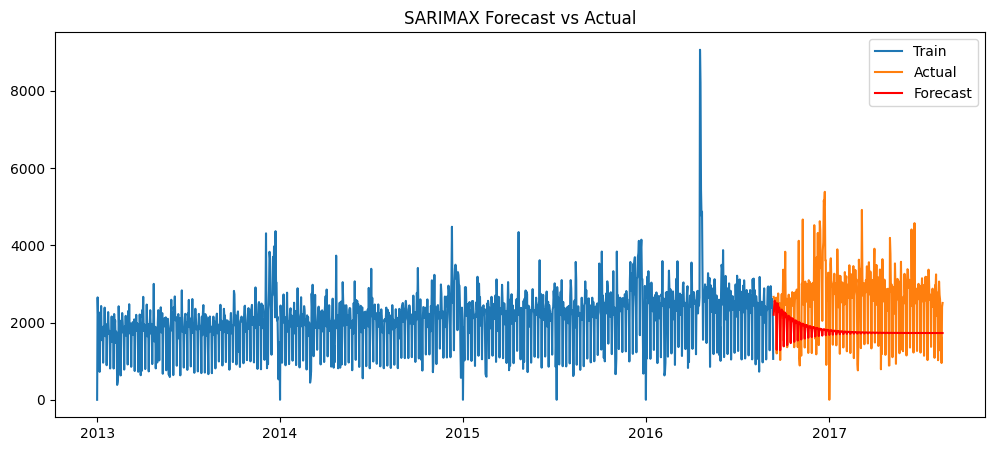

In [ ]:
#Plot Forecast vs Actual
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title("SARIMAX Forecast vs Actual")
plt.legend()
plt.show()
